# Divergencia

Divergencia je skalárna veličina, ktorá popisuje žriedlovosť vektorového pola, t.j. či do zvoleného bodu pole vteká (sinks) alebo z neho vyteká (source).

Divergencia vektorového poľa $\mathbf{F}$ definujeme ako

\begin{equation}
div \,  \mathbf{F} = \nabla . \mathbf{F} = \frac{\partial F_x}{\partial x} + \frac{\partial F_y}{\partial y} + \frac{\partial F_z}{\partial z}
\end{equation}

### Diskrétna aproximácia divergencie 

Diskrétnu aproximáciu divergencie v rovine $(x,y)$ môžeme odvodiť zo zložiek vektorového poľa na hranách malej plošky o rozmere $dx \times dy$. Predpokladáme, že hodnoty zložiek poľa sú konštantné pozdĺž hrán plošky.

<img src="./img/div_2d_01.png" width=400px alt="Divergencia v x-y rovine" scale="1.25">

Pre divergenciu potom môžeme približne písať (pre $\Delta x, \Delta y \rightarrow 0$)

\begin{equation*}
\frac{\partial F_x}{\partial x} + \frac{\partial F_y}{\partial y} \approx
\frac{F_x(x +\frac{\Delta x}{2}, y) - F_x(x -\frac{\Delta x}{2}, y) }{\Delta x} +
\frac{F_y(x, y +\frac{\Delta y}{2} ) - F_y(x, y -\frac{\Delta y}{2}) }{\Delta y} 
\end{equation*}

Pre $\Delta x = \Delta y = \delta$ môžeme vzťah upraviť

\begin{equation}
\frac{\partial F_x}{\partial x} + \frac{\partial F_y}{\partial y} \approx
\frac{1}{\delta} \big(
F_x(x +\frac{\delta}{2}, y) - F_x(x -\frac{\delta}{2}, y) + F_y(x, y +\frac{\delta}{2} ) - F_y(x, y -\frac{\delta}{2}) \big)
\end{equation}



### Symbolický výpočet 

Pomocou symbolických manipulácií *sympy* určime divergenciu vektorového poľa v 2D rovine

\begin{equation*}
\mathbf{F}(x,y) =  \mathbf{i} \, \left( -y \, (1-x-y)+ \frac{x}{4} \right)  +  \mathbf{j} \, \left(2 -x^2 + \frac{y}{4} \right) 
\end{equation*}

In [1]:
%reset -f 
from utils.utils import *
from sympy import *
from sympy.vector import CoordSys3D, divergence

r = CoordSys3D('r')                  # suradnicova sustava
F = (-r.y*(1 - r.x - r.y) + r.x/4)*r.i + (2 - r.x**2 + r.y/4)*r.j
D = divergence(F)

ltxprint(r'\nabla \cdot \mathbf{F}', D)

'$\\nabla \\cdot \\mathbf{F}=\\mathbf{{y}_{r}} + \\frac{1}{2}$'

### Vizualizácia

Výsledok symbolického výpočtu divergencie v *sympy* zobrazíme pomocou knižníc *matplotlib* a *numpu* formálnou substitúciou premenných a vyhodnotením reťazcov.

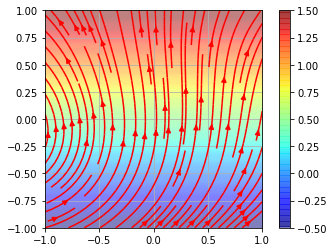

In [2]:
# formalna substitucia premennych, x,y - nie su premenne v sympy, ale retazce
Fx = F.components[r.i].subs([(r.x, 'x'), (r.y, 'y')])                 
Fy = F.components[r.j].subs([(r.x, 'x'), (r.y, 'y')]) 
Ds = D.subs([(r.x, 'x'), (r.y, 'y')])   

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

dx = np.linspace(-1.0, 1.0, 20)    # rozsahy suradnic
dy = np.linspace(-1.0, 1.0, 20)
x, y = np.meshgrid(dx, dy) 

a = eval(str(Fx))                  # numericky vypocet zloziek
b = eval(str(Fy))                  # vyhodnotenie retazcov - konverzia zo sympy
d = eval(str(Ds))

fig = plt.figure() 
ax = fig.add_subplot(111)
ax.streamplot(x, y, a, b, color='r')
img = ax.imshow(d, extent=[-1, 1, -1, 1], origin='lower', interpolation='kaiser', 
                 clip_on=True, alpha=0.5, cmap='jet') 
fig.colorbar(img)
plt.grid() 
plt.show()